In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
import os
sys.path.append('../python/')

#set up matplotlib
os.environ['MPLCONFIGDIR'] = '../mplstyles'
print(os.environ['MPLCONFIGDIR'])
import matplotlib as mpl
from matplotlib import pyplot as plt
#got smarter about the mpl config: see mplstyles/ directory
plt.style.use('standard')
print(mpl.__version__) 
print(mpl.get_configdir())


#fonts
# Set the font dictionaries (for plot title and axis titles)
title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'32'}
legend_font = {'fontname':'Arial', 'size':'22'}

#fonts global settings
mpl.rc('font',family=legend_font['fontname'])


#set up numpy
import numpy as np

../mplstyles
3.0.3
/home/phys/villaa/analysis/misc/nrFano_Constraint/mplstyles


# Using New Calculations to Determine $\sigma_Q$

In the note `QEr_2D_joint.ipynb` we found the two-dimensional Q-$\tilde{E}_r$ distribution that we expect, given a certain Edelweiss detector resolution from their 2004 paper [REF]. Here, we compare the Edw. expectation for the yield (Q) width to what one would expect given those two-dimensional distributions. We also compare to data generated in our "physically correct" style (see `ms_correction.ipynb`). 



In [2]:
#get the resolutions for GGA3
import EdwRes as er

aH=0.035
V=4.0
C=0.0
sigHv,sigIv,sigQerv,sigH_NRv,sigI_NRv,sigQnrv = er.getEdw_det_res('GGA3',V,'data/edw_res_data.txt',aH,C)

In [3]:
#make an electron-recoil data set
import observable_simulations as osim
Qer,Erer = osim.simQEr_ER('GGA3',V=V,aH=aH,C=C,F=0.0,HighER=300)

print(Erer)

[191.45178189 181.06959637 101.56447338 ...  66.40066645 211.72800338
  96.54938801]


In [4]:
#get statistics given a certain binning
import histogram_yield as hy
#bins = [0,20,40,60,80,100,120,140,160,180,200]
bins = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]
bins = np.asarray(bins)
xE = (bins[:-1] + bins[1:]) / 2

bindf,bindfE = hy.QEr_Ebin(Qer, Erer, bins=bins,silent=True)
qbootsigs,qbootsigerrsl,qbootsigerrsu = hy.QEr_Qboot(bindf,bins,silent=True)
qbootcorrs = hy.QEr_QbootBC(bindfE,qbootsigs,xE,20,bins,silent=True)

print(qbootsigs)
print(qbootsigerrsl)
print(qbootsigerrsu)
print(qbootcorrs)

[39.98809612  0.14760654  0.09129933  0.07049224  0.06017836  0.05428365
  0.05049318  0.0483232   0.04659549  0.0453482   0.04449361  0.04358652
  0.04315511  0.04282405  0.04236771  0.04203741  0.0417014   0.04160801
  0.04149793  0.04147685]
[2.41318382e+01 7.17685377e-04 4.10710789e-04 3.14151396e-04
 2.63969012e-04 2.37085456e-04 2.26137021e-04 2.13553362e-04
 2.03199660e-04 2.01790691e-04 1.99444879e-04 1.96085057e-04
 1.93897186e-04 1.89349561e-04 1.86440730e-04 1.82619273e-04
 1.83319461e-04 1.88088598e-04 1.87743386e-04 1.88490971e-04]
[2.57319102e+01 7.08777926e-04 4.18853374e-04 3.18566322e-04
 2.67035999e-04 2.44391391e-04 2.21671795e-04 2.10353599e-04
 2.07059105e-04 2.04225154e-04 2.01891796e-04 1.98177267e-04
 1.94222643e-04 1.92171840e-04 1.90068417e-04 1.90590759e-04
 1.93594967e-04 1.86129354e-04 1.85235001e-04 1.87649742e-04]
[164.22224641   0.22433549   0.99030879   0.99595056   0.99747288
   0.99808291   0.99847941   0.99876594   0.9988511    0.99901237
   0.999126

In [5]:
import fano_calc as fc

#recall defaults (filename='test.h5', 
#det='GGA3',band='ER',F=0.00001,V=4.0,alpha=(1/10000.0),aH=0.035,Erv=None,sigv=None,erase=False)
E,sig = fc.RWCalc(filename='data/test.h5')

print(np.shape(E))

GGA3/ER/4.0/1.000E-04/0.035/000/
True
(204,)


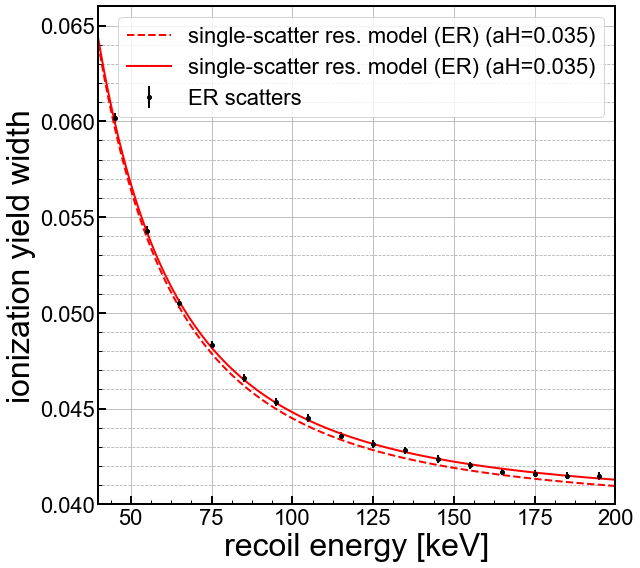

In [6]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes





X=np.arange(0.1,200,0.1)


ax1.plot(X,sigQerv(X),color='r',linestyle="--",linewidth=2, \
         label='single-scatter res. model (ER) (aH={})'.format(aH))
ax1.plot(E,sig,color='r',linestyle="-",linewidth=2, \
         label='single-scatter res. model (ER) (aH={})'.format(aH))
ax1.errorbar(xE,qbootsigs, yerr=(qbootsigerrsl,qbootsigerrsu), \
             color='k', marker='o',markersize=4,linestyle='none',label='ER scatters', linewidth=2)




ymin = 0.04
ymax = 0.066



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(40, 200) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]',**axis_font)
ax1.set_ylabel('ionization yield width',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/figure.png')
plt.show()

In [7]:
#do this for NR singles as well
import observable_simulations as osim
import histogram_yield as hy

Q,Ernr,Q_ss,Ernr_ss = osim.simQEr('GGA3',V=V,aH=aH,C=C,highstats=True)
bindf,bindfE = hy.QEr_Ebin(Q_ss, Ernr_ss, bins=bins,silent=True)
qbootsigs_nr,qbootsigerrsl_nr,qbootsigerrsu_nr = hy.QEr_Qboot(bindf,bins,silent=True)
qbootcorrs_nr = hy.QEr_QbootBC(bindfE,qbootsigs_nr,xE,20,bins,silent=True)

print(qbootsigs_nr)
print(qbootsigerrsl_nr)
print(qbootsigerrsu_nr)
print(qbootcorrs_nr)

[5.74652332e+01 8.91902179e-02 5.22469244e-02 3.78690709e-02
 3.00888527e-02 2.64353247e-02 2.21541340e-02 2.09857058e-02
 1.92478391e-02 1.71904068e-02 1.63634891e-02 1.70152570e-02
 1.61117822e-02 1.49112814e-02 1.36150164e-02 1.32182508e-02
 1.42591131e-02 1.43477608e-02 1.55337658e-02 1.61912675e-02]
[2.22246366e+01 1.31942516e-03 1.01938019e-03 9.55136284e-04
 8.80110318e-04 9.88163889e-04 8.95155864e-04 1.13394407e-03
 9.18726921e-04 1.08904216e-03 1.15502940e-03 1.29166825e-03
 1.66157826e-03 1.43196007e-03 1.91336482e-03 1.69641466e-03
 2.25816085e-03 2.51879507e-03 2.42075237e-03 4.03199168e-03]
[2.51889643e+01 1.31137843e-03 1.02929536e-03 9.64094388e-04
 8.77029232e-04 9.96748587e-04 9.12832687e-04 1.14698281e-03
 9.43648296e-04 1.11922774e-03 1.18808753e-03 1.38433893e-03
 1.68763139e-03 1.52137320e-03 1.99805696e-03 1.95660870e-03
 2.48006899e-03 2.79594819e-03 2.95298084e-03 5.32821936e-03]
[3.31026104e+02 1.51303403e-01 9.61943274e-01 9.80594435e-01
 9.86273936e-01 9.883

In [8]:
#get the NR calculations for our yield band
Enr,signr = fc.RWCalc(filename='data/test.h5',band='NR',alpha=(1/18.0))

#Enr,signr = fc.RWCalc(filename='data/test.h5',band='NR')
print(np.shape(Enr))
print(signr[0])

GGA3/NR/4.0/5.556E-02/0.035/000/
True
(200,)
0.16121389987552073


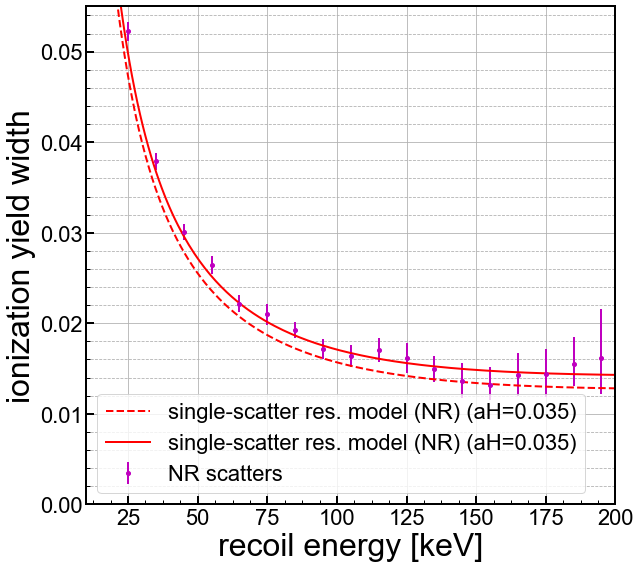

In [9]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes





X=np.arange(0.1,200,0.1)


ax1.plot(X,sigQnrv(X),color='r',linestyle="--",linewidth=2, \
         label='single-scatter res. model (NR) (aH={})'.format(aH))
ax1.plot(Enr,signr,color='r',linestyle="-",linewidth=2, \
         label='single-scatter res. model (NR) (aH={})'.format(aH))
ax1.errorbar(xE,qbootsigs_nr, yerr=(qbootsigerrsl_nr,qbootsigerrsu_nr), \
         color='m', marker='o', markersize=4,linestyle='none',label='NR scatters', linewidth=2)




ymin = 0.00
ymax = 0.055



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(10, 200) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]',**axis_font)
ax1.set_ylabel('ionization yield width',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=3,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/figure.png')
plt.show()

In [10]:
#make a multiples-scatter plot
bindf_ms,bindfE_ms = hy.QEr_Ebin(Q, Ernr, bins=bins,silent=True)
qbootsigs_nr_ms,qbootsigerrsl_nr_ms,qbootsigerrsu_nr_ms = hy.QEr_Qboot(bindf_ms,bins,silent=True)

In [11]:
#let's make a callable out of the predicted single-scatter resolution
import scipy.interpolate as inter

sigQnr_c = inter.InterpolatedUnivariateSpline(Enr, signr, k=3)
sigQnr_c_v = np.vectorize(sigQnr_c)
print(sigQnrv(150))
print(sigQnr_c_v(150))

0.013394205525342796
0.014841712781795672


In [12]:
#also construct a residual function for use with lmfit
import lmfit as lmf

def residual(params, x, data, eps_data,sigQfunc):
    Cms = params['Cms']
    m = params['m']


    model = np.sqrt(sigQfunc(x)**2 + (Cms+m*x)**2)

    return (data-model) / eps_data

def residual_const(params, x, data, eps_data,sigQfunc):
    Cms = params['Cms']


    model = np.sqrt(sigQfunc(x)**2 + (Cms)**2)

    return (data-model) / eps_data

#do it with lmfit
params = lmf.Parameters()
params.add('Cms', value=0.02)
lmfout = lmf.minimize(residual_const, params, args=(xE, qbootsigs_nr_ms, qbootsigerrsu_nr_ms,sigQnr_c_v))
#print(lmf.fit_report(lmfout))
print('lmfit result--multiples: constant C')
print(lmf.report_fit(lmfout.params))

Cms_const = lmfout.params['Cms'].value

params = lmf.Parameters()
params.add('Cms', value=0.02)
params.add('m', value=0)
lmfout = lmf.minimize(residual, params, args=(xE, qbootsigs_nr_ms, qbootsigerrsu_nr_ms,sigQnr_c_v))
#print(lmf.fit_report(lmfout))
print('lmfit result--multiples: linear C')
print(lmf.report_fit(lmfout.params))

Cms = lmfout.params['Cms'].value
slope = lmfout.params['m'].value

lmfit result--multiples: constant C
[[Variables]]
    Cms:  0.02419341 +/- 7.1153e-04 (2.94%) (init = 0.02)
None
lmfit result--multiples: linear C
[[Variables]]
    Cms:  0.02008916 +/- 0.00129995 (6.47%) (init = 0.02)
    m:    5.1685e-05 +/- 1.4408e-05 (27.88%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(Cms, m) = -0.900
None


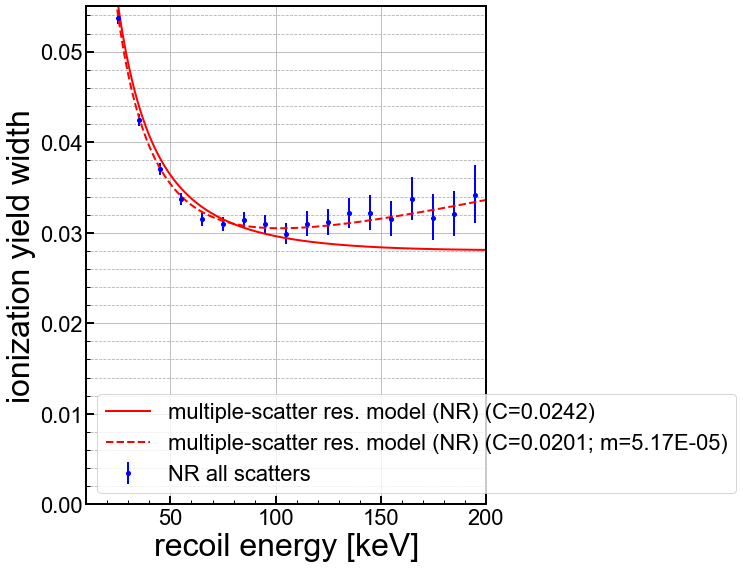

In [13]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes





X=np.arange(0.1,200,0.1)



ax1.plot(X,np.sqrt(sigQnr_c_v(X)**2+Cms_const**2),color='r',linestyle="-",linewidth=2, \
         label='multiple-scatter res. model (NR) (C={:01.3})'.format(Cms_const))
ax1.plot(X,np.sqrt(sigQnr_c_v(X)**2+(Cms+X*slope)**2),color='r',linestyle="--",linewidth=2, \
         label='multiple-scatter res. model (NR) (C={:01.3}; m={:01.2E})'.format(Cms,slope))
ax1.errorbar(xE,qbootsigs_nr_ms, yerr=(qbootsigerrsl_nr_ms,qbootsigerrsu_nr_ms), \
         color='b', marker='o', markersize=4,linestyle='none',label='NR all scatters', linewidth=2)




ymin = 0.00
ymax = 0.055



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(10, 200) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]',**axis_font)
ax1.set_ylabel('ionization yield width',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=3,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/figure.png')
plt.show()